In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('data_out_snow/snowSeason_sattel_hochstuckli.csv')
df2 = pd.read_csv('data_out_snow/snowSeason_Atzmaening.csv')
df3 = pd.read_csv('data_out_snow/snowSeason_hoch-brig.csv')
df4 = pd.read_csv('data_out_snow/snowSeason_villars-diablerets.csv')
df5 = pd.read_csv('data_out_snow/snowSeason_champex.csv')
df6 = pd.read_csv('data_out_snow/snowSeason_davos.csv')

In [3]:
pd.set_option('display.max_columns',69)

In [4]:
df6.tail(5)

,DATE,isOverSnowTotal_CLMCOM-CCLM4-ECEARTH-EUR11-RCP45-pcp,isOverSnowTotal_CLMCOM-CCLM4-ECEARTH-EUR11-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM4-HADGEM-EUR11-RCP45-pcp,isOverSnowTotal_CLMCOM-CCLM4-HADGEM-EUR11-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM4-HADGEM-EUR44-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM4-MPIESM-EUR11-RCP45-pcp,isOverSnowTotal_CLMCOM-CCLM4-MPIESM-EUR11-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM4-MPIESM-EUR44-RCP45-pcp,isOverSnowTotal_CLMCOM-CCLM4-MPIESM-EUR44-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM5-ECEARTH-EUR44-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM5-HADGEM-EUR44-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM5-MIROC-EUR44-RCP85-pcp,isOverSnowTotal_CLMCOM-CCLM5-MPIESM-EUR44-RCP85-pcp,isOverSnowTotal_DMI-HIRHAM-ECEARTH-EUR11-RCP26-pcp,isOverSnowTotal_DMI-HIRHAM-ECEARTH-EUR11-RCP45-pcp,isOverSnowTotal_DMI-HIRHAM-ECEARTH-EUR11-RCP85-pcp,isOverSnowTotal_DMI-HIRHAM-ECEARTH-EUR44-RCP45-pcp,isOverSnowTotal_DMI-HIRHAM-ECEARTH-EUR44-RCP85-pcp,isOverSnowTotal_ICTP-REGCM-HADGEM-EUR44-RCP85-pcp,isOverSnowTotal_KNMI-RACMO-ECEARTH-EUR44-RCP45-pcp,isOverSnowTotal_KNMI-RACMO-ECEARTH-EUR44-RCP85-pcp,isOverSnowTotal_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp,isOverSnowTotal_KNMI-RACMO-HADGEM-EUR44-RCP45-pcp,isOverSnowTotal_KNMI-RACMO-HADGEM-EUR44-RCP85-pcp,isOverSnowTotal_MPICSC-REMO1-MPIESM-EUR11-RCP26-pcp,isOverSnowTotal_MPICSC-REMO1-MPIESM-EUR11-RCP45-pcp,isOverSnowTotal_MPICSC-REMO1-MPIESM-EUR11-RCP85-pcp,isOverSnowTotal_MPICSC-REMO1-MPIESM-EUR44-RCP26-pcp,isOverSnowTotal_MPICSC-REMO1-MPIESM-EUR44-RCP45-pcp,isOverSnowTotal_MPICSC-REMO1-MPIESM-EUR44-RCP85-pcp,isOverSnowTotal_MPICSC-REMO2-MPIESM-EUR11-RCP26-pcp,isOverSnowTotal_MPICSC-REMO2-MPIESM-EUR11-RCP45-pcp,isOverSnowTotal_MPICSC-REMO2-MPIESM-EUR11-RCP85-pcp,isOverSnowTotal_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp,isOverSnowTotal_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp,isOverSnowTotal_MPICSC-REMO2-MPIESM-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-CCCMA-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-CCCMA-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-CSIRO-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-CSIRO-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-ECEARTH-EUR11-RCP26-pcp,isOverSnowTotal_SMHI-RCA-ECEARTH-EUR11-RCP45-pcp,isOverSnowTotal_SMHI-RCA-ECEARTH-EUR11-RCP85-pcp,isOverSnowTotal_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp,isOverSnowTotal_SMHI-RCA-ECEARTH-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-ECEARTH-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-GFDL-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-GFDL-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-HADGEM-EUR11-RCP45-pcp,isOverSnowTotal_SMHI-RCA-HADGEM-EUR11-RCP85-pcp,isOverSnowTotal_SMHI-RCA-HADGEM-EUR44-RCP26-pcp,isOverSnowTotal_SMHI-RCA-HADGEM-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-HADGEM-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-IPSL-EUR11-RCP45-pcp,isOverSnowTotal_SMHI-RCA-IPSL-EUR11-RCP85-pcp,isOverSnowTotal_SMHI-RCA-IPSL-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-IPSL-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-MIROC-EUR44-RCP26-pcp,isOverSnowTotal_SMHI-RCA-MIROC-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-MIROC-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-MPIESM-EUR11-RCP45-pcp,isOverSnowTotal_SMHI-RCA-MPIESM-EUR11-RCP85-pcp,isOverSnowTotal_SMHI-RCA-MPIESM-EUR44-RCP26-pcp,isOverSnowTotal_SMHI-RCA-MPIESM-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-MPIESM-EUR44-RCP85-pcp,isOverSnowTotal_SMHI-RCA-NORESM-EUR44-RCP26-pcp,isOverSnowTotal_SMHI-RCA-NORESM-EUR44-RCP45-pcp,isOverSnowTotal_SMHI-RCA-NORESM-EUR44-RCP85-pcp
113,2094-2095,139,107,130,101,109,126,120,126,115,90,107,128,118,181,141,117,144,68,105,137,111,167,141,119,181,118,115,181,119,113,181,134,109,181,135,100,119,55,142,97,138,133,125,137,137,96,155,148,129,92,112,114,99,116,107,116,112,144,152,123,119,114,180,123,113,154,118,123
114,2095-2096,167,130,135,102,114,134,137,126,146,131,118,120,145,182,172,147,163,127,126,142,143,136,136,120,182,144,140,182,129,149,182,162,120,182,134,122,120,119,136,103,148,138,122,137,143,101,135,117,138,98,135,133,85,127,77,129,77,140,128,119,138,98,182,129,96,126,145,100
115,2096-2097,152,131,126,96,96,137,94,135,92,126,95,

In [5]:
df1Columns= df1.columns
df2Columns= df2.columns
df3Columns= df3.columns
df4Columns= df4.columns
df5Columns= df5.columns
df6Columns= df6.columns

In [6]:
dfsColumns = [df1Columns, df2Columns, df3Columns, df4Columns, df5Columns, df6Columns]

### Analysis 1: Run and visualize 68 CH2018 scenarios, and the associated  seasonal situation of six different ski resorts

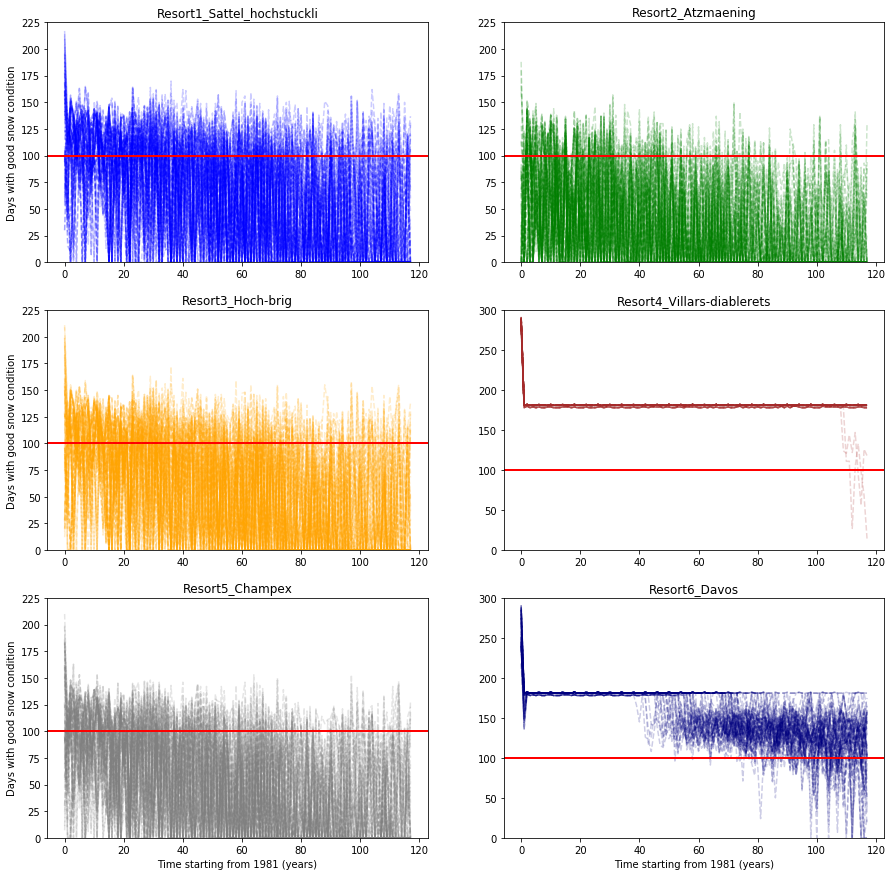

In [16]:
import matplotlib.pyplot as plt

#fig, (ax1 , ax2) = plt.subplots(1, 2)
m= 3
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))
y = 118
x_axis = np.arange(y)


def generate_plot(df, dfColumns, m, n, colorLines, BotYaxis, TopYaxis,fig_Title, fig_X_Lable, fig_Y_Lable):
    for i in range (1 , len(dfColumns), 1):
    #res1_sc1 = df[dfColumns[i]]
        axs[m,n].plot(x_axis, df[dfColumns[i]], color=colorLines, linestyle = '--', alpha=0.2)
        axs[m,n].axhline(y=100, color='r')
        axs[m,n].set_ylim(bottom=BotYaxis, top =TopYaxis)
        axs[m,n].set_title(fig_Title)
        axs[m,n].set_xlabel(fig_X_Lable)
        axs[m,n].set_ylabel(fig_Y_Lable)
        

generate_plot(df1, df1Columns,0,0,'blue',0,225, "Resort1_Sattel_hochstuckli","","Days with good snow condition")
generate_plot(df2, df2Columns,0,1,'green', 0,225, 'Resort2_Atzmaening',"","")
generate_plot(df3, df3Columns,1,0,'orange', 0,225, 'Resort3_Hoch-brig',"","Days with good snow condition")
generate_plot(df4, df4Columns,1,1,'brown', 0,300, 'Resort4_Villars-diablerets',"","")
generate_plot(df5, df5Columns,2,0,'gray', 0,225, 'Resort5_Champex',"Time starting from 1981 (years)","Days with good snow condition")
generate_plot(df6, df6Columns,2,1,'navy', 0,300, 'Resort6_Davos',"Time starting from 1981 (years)","")

plt.show()

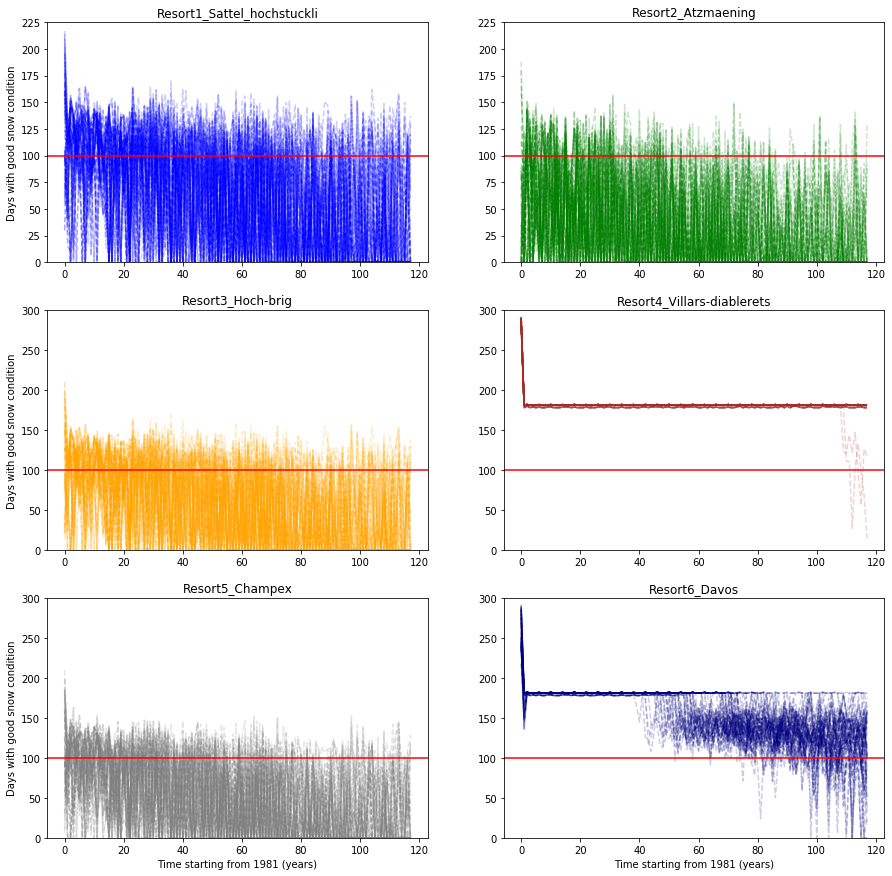